In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#### Load the data

In [58]:
data = pd.read_csv("normalized_data.csv")

#### Data details

In [59]:
data.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.067334,17.906392,0.491393,12.552416,2.510472,2.181818,2.661510,2.752502,2.644485,2.511150,...,2.769821,2.771636,2.618779,2.646149,2.650000,1.880777,2.734062,2.768881,2.616576,0.994565
std,6.116329,9.415475,0.499927,7.709184,1.408614,0.833575,1.547572,1.400208,1.324285,0.948342,...,1.431721,1.412177,1.314598,1.382763,1.528691,1.046409,1.422664,1.416559,1.530276,0.820555
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.830755,3.000000,3.000000,2.519161,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.884440,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,112.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [60]:
target_var = "academic_performance"

#### Visualize the distribution of the academic_performance

<AxesSubplot:>

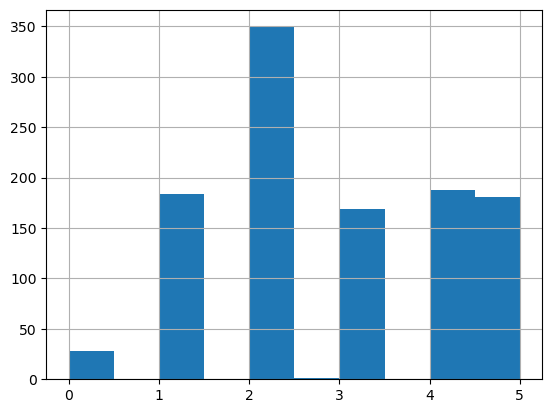

In [61]:
data[target_var].hist()

# Step 2: Feature Engineering

### Check Feature importance

In [62]:
X = data.loc[:, ~data.columns.isin(["academic_performance", "student_id"])]
y = data['academic_performance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the model using Logistic Regression

In [63]:
model = LinearRegression()

In [64]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [65]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.6556268694538029


In [66]:
feature_importance = pd.Series(model.coef_, index=X.columns)
print('Feature Importance:')
print(feature_importance)

Feature Importance:
anxiety_level                  -0.003446
self_esteem                     0.005206
mental_health_history          -0.174092
depression                      0.001680
headache                       -0.105903
blood_pressure                  0.306620
sleep_quality                   0.070414
breathing_problem              -0.034817
noise_level                     0.054473
living_conditions               0.005330
safety                          0.053451
basic_needs                     0.094852
study_load                     -0.008653
teacher_student_relationship    0.095631
future_career_concerns         -0.061583
social_support                  0.239044
peer_pressure                   0.024935
extracurricular_activities     -0.076559
bullying                       -0.104790
stress_level                   -0.237920
dtype: float64


In [67]:
most_imp_feature = X.columns[feature_importance.argmax()]

In [68]:
print("The most important feature for {} is {}".format(target_var, most_imp_feature))

The most important feature for academic_performance is blood_pressure
